In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import animation
from scipy.integrate import solve_ivp

In [2]:
# u0  u1  u2  u3   u4   u5   u6   u7
# x1  y1  x2  y2  v1x  v1y  v2x  v2y 
def orbitfunct(t,u): 
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    r1 = np.sqrt((u[0]**2 + u[1]**2))
    r2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    r12 = np.sqrt(dx**2 + dy**2)
    q1 = -g*ms/(r1**3)
    q2 = -g*ms/(r2**3)
    q12 = -g*mp2/(r12**3)
    q21 = -g*mp1/(r12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [3]:
#defining variables 
g   = 6.67e-11
ms  = 1.98e30 
re  = 150e9
mp1 = ms * 0.001 
mp2 = mp1 
rp1 = re 
rp2 = re*0.95

#keplers law
k = 4 * (np.pi**2)/(g * ms) #constant of proportionality 
pp1 = np.sqrt(k * (rp1**3))
pp2 = np.sqrt(k * (rp2**3))
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

In [4]:
#modified version, graphs grouped

def show(sol):
    fig1 = plt.figure() #fig 1, origins in x,y plane
    ax1 = plt.subplot()
    ax1.set_xlim((-2e8, 2e8))
    ax1.set_ylim((-2e8, 2e8))
    ax1.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-')
    ax1.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-')
    ax1.plot(0,0,'ko', lw=2)
    ax1.set_xlabel('X (km)')
    ax1.set_ylabel('Y (km)')
    
    fig2 = plt.figure() #fig 2, 3D orbitals over time
    ax2 = fig2.add_subplot(projection='3d')
    ax2.set_xlim((-2e8, 2e8))
    ax2.set_ylim((-2e8, 2e8))
    ax2.set_zlim((t0, tmax))
    ax2.set_xlabel('x position (km)')
    ax2.set_ylabel('y position (km)') 
    ax2.set_zlabel('time (s)')
    ax2.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-')
    ax2.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') 
    rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
    rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)
    
    fig3 = plt.figure() #fig 3, sun-planet distance
    ax3 = plt.subplot(1,1,1)
    ax3.set_xlim((t0, tmax))
    ax3.set_ylim((0, 2e8))
    ax3.plot(t,rad1/1000, 'g-')
    ax3.plot(t,rad2/1000, 'r-')
    ax3.set_xlabel('time (s)')
    ax3.set_ylabel('Orbital Radius, R (km)') 
    
    delx = sol.y[0] - sol.y[2]
    dely = sol.y[1] - sol.y[3]  
    rad12 = np.sqrt(delx**2 + dely**2)
    
    fig4 = plt.figure() # fig 4, distance
    ax4 = plt.subplot(1,1,1)
    ax4.set_xlim((t0, tmax))
    ax4.set_ylim((0, 5e8)) 
    ax4.plot(t,rad12/1000, 'g-')
    ax4.set_xlabel('time (s)')
    ax4.set_ylabel('Planetary distance, R12 (km)')
    velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)
    velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)
    
    fig5 = plt.figure() #fig 5, velocity
    ax5 = plt.subplot(1,1,1)
    ax5.set_xlabel('time (s)')
    ax5.set_ylabel('Planetary Velocity (m/s)')
    ax5.set_xlim([t0,tmax])
    ax5.plot(t,velop1, 'g-')
    ax5.plot(t,velop2, 'r-')

In [5]:
Dt = 360
t0 = 0
tmax = 20*pp1
t = np.arange(t0,tmax,Dt)

In [6]:
#part 1

In [7]:
mp1 = ms * 0.001 
mp2 = mp1 #kg
rp1 = re 
rp2 = re*0.95
pp1 = np.sqrt(k * (rp1**3))
pp2 = np.sqrt(k * (rp2**3))
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

In [8]:
pt1 = np.zeros((8))
pt1[0] = rp1 * np.cos(0.05 * np.pi/180)
pt1[1] = rp1 * np.sin(0.05 * np.pi/180)
pt1[2] = rp2 * np.cos(-0.05 * np.pi/180)
pt1[3] = rp2 * np.sin(-0.05 * np.pi/180)
pt1[4] = 0
pt1[5] = vp1
pt1[6] = 0
pt1[7] = -vp2

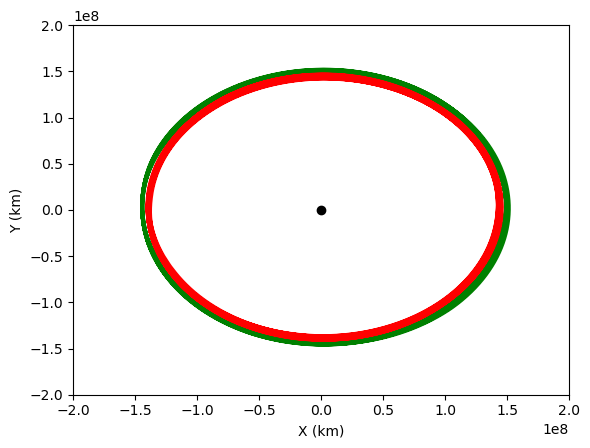

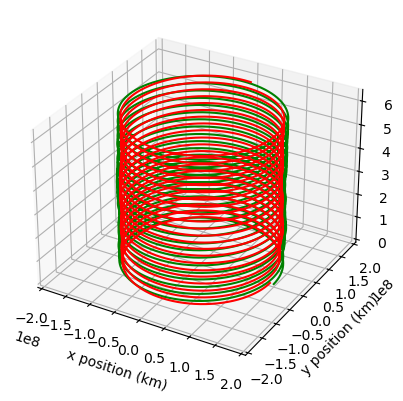

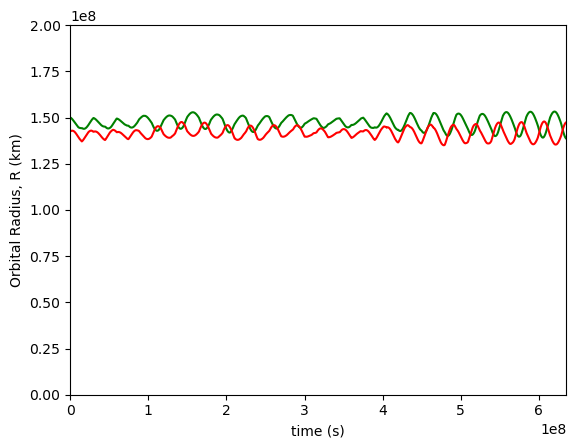

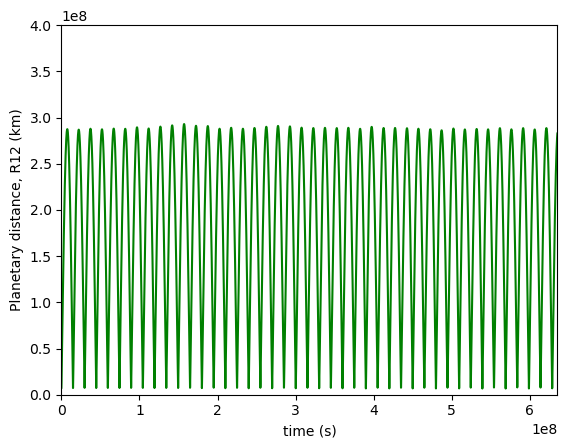

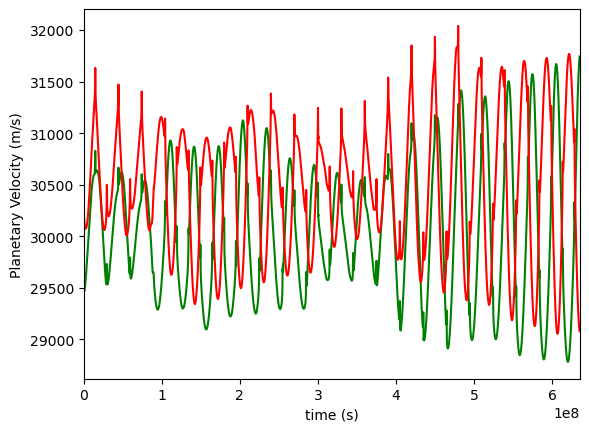

In [9]:
sol1 = solve_ivp(orbitfunct, [t0, tmax], pt1, method='DOP853', t_eval=t)
show(sol1)

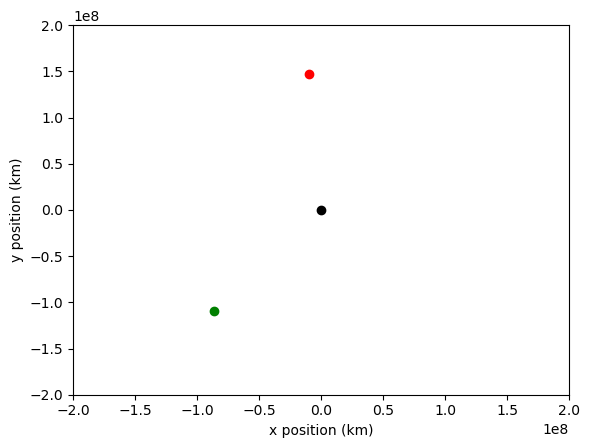

In [10]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)
    
N = 1764641
Nframes = 800
Nskip = int(N/Nframes)

def animate(i):
    if i < len(sol1.t):
        xp1 = sol1.y[0][i * Nskip] / 1000
        yp1 = sol1.y[1][i * Nskip] / 1000
        xp2 = sol1.y[2][i * Nskip] / 1000
        yp2 = sol1.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation1.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

In [11]:
#part 2

In [12]:
mp1 = ms*0.001 
mp2 = mp1*0.01 
rp1 = re 
rp2 = re*1.001
pp1 = np.sqrt(k * (rp1**3)) 
pp2 = np.sqrt(k * (rp2**3))
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

In [13]:
pt2 = np.zeros((8))
pt2[0] = rp1
pt2[1] = 0
pt2[2] = 1.001*rp2
pt2[3] = 0
pt2[4] = 0
pt2[5] = -vp1
pt2[6] = 0
pt2[7] = -2.11*vp1

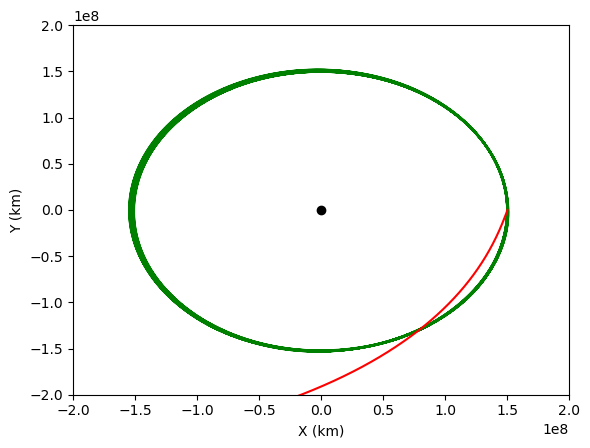

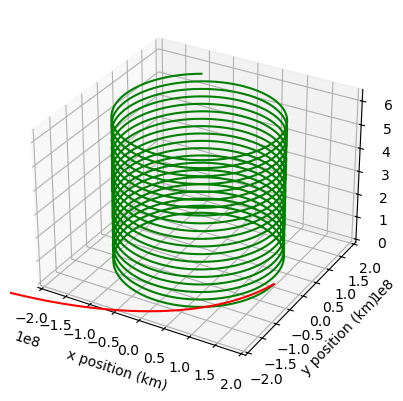

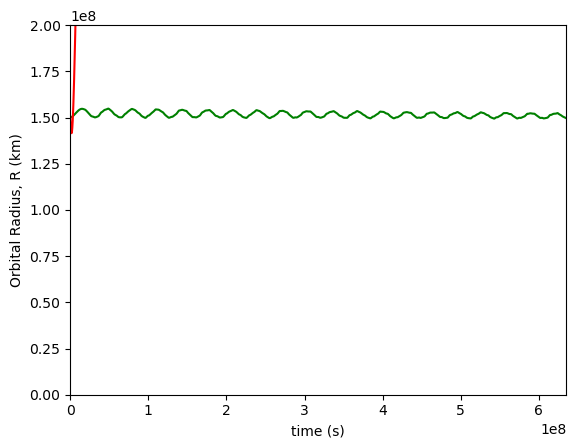

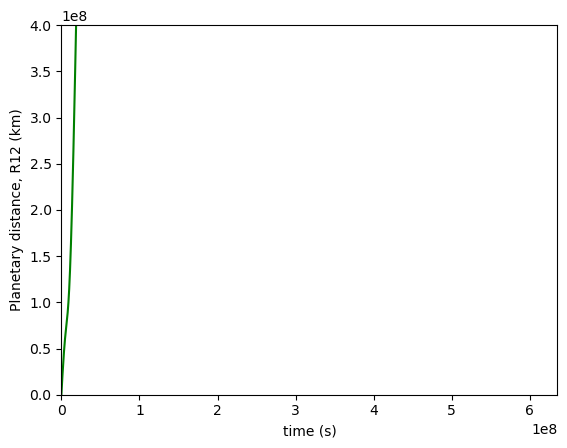

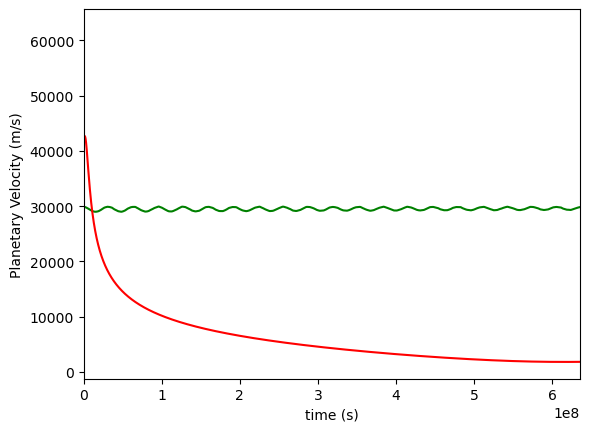

In [14]:
sol2 = solve_ivp(orbitfunct, [t0, tmax], pt2, method='DOP853', t_eval=t)
show(sol2)

In [ ]:
fig = plt.figure()
ax = fig.subplots()
#plt.axis( [-4e8, 4e8, -4e8, 4e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def animate2(i):
    if i < len(sol2.t):
        xp1 = sol2.y[0][i * Nskip] / 1000
        yp1 = sol2.y[1][i * Nskip] / 1000
        xp2 = sol2.y[2][i * Nskip] / 1000
        yp2 = sol2.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2


anim2 = animation.FuncAnimation(fig, animate2, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation2.gif"
anim2.save(f, writer=writergif)

In [16]:
#part 3

In [17]:
mp1 =  ms * 0.0008 
mp2 =   mp1 * 0.05 
rp1 = re 
rp2 = re * 0.80
pp1 = np.sqrt(k * (rp1**3))
pp2 = np.sqrt(k * (rp2**3))
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

In [18]:
pt3 = np.zeros((8))
pt3[0] = rp1 * np.cos(0.05 * np.pi/180)
pt3[1] = rp1 * np.sin(0.05 * np.pi/180)
pt3[2] = rp2 * np.cos(-0.05 * np.pi/180)
pt3[3] = rp2 * np.sin(-0.05 * np.pi/180)
pt3[4] = 0
pt3[5] = vp1
pt3[6] = 0
pt3[7] = vp2

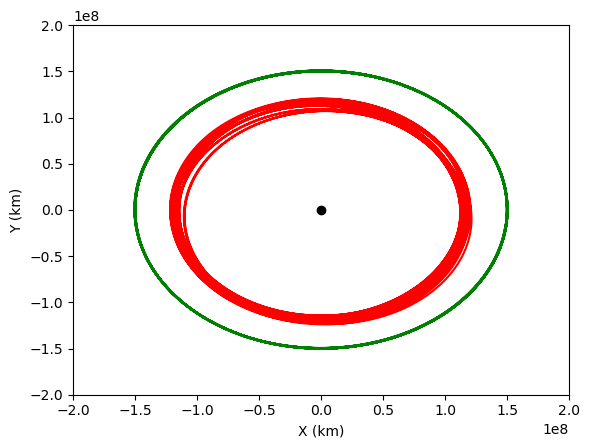

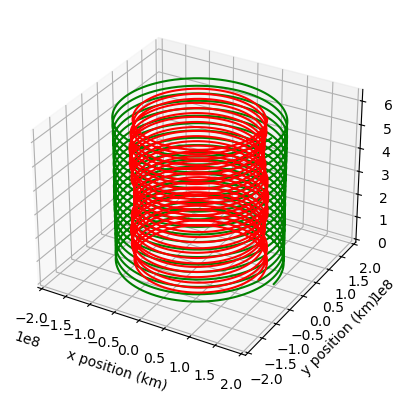

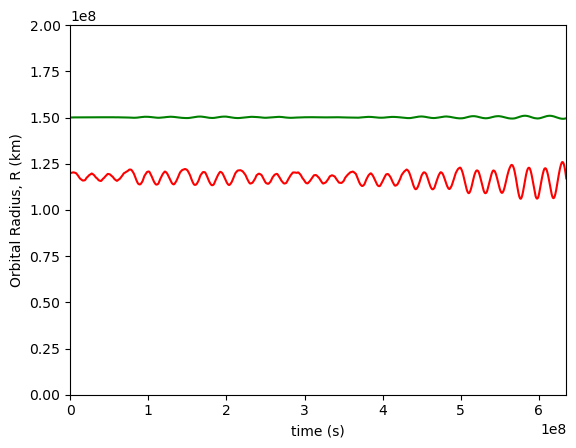

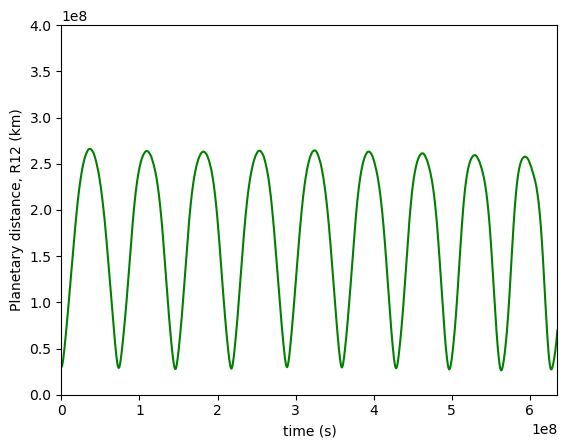

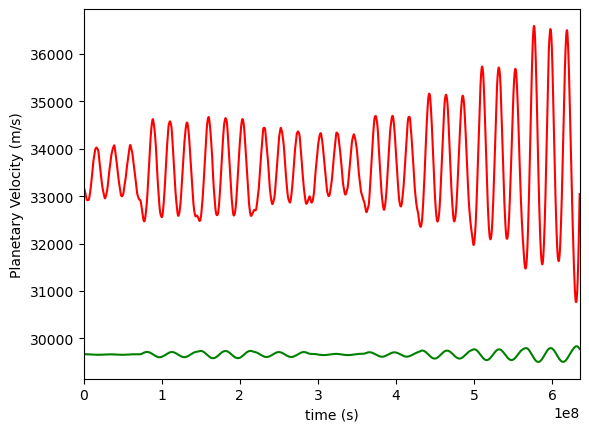

In [19]:
sol3 = solve_ivp(orbitfunct, [t0, tmax], pt3, method='DOP853', t_eval=t)
show(sol3)

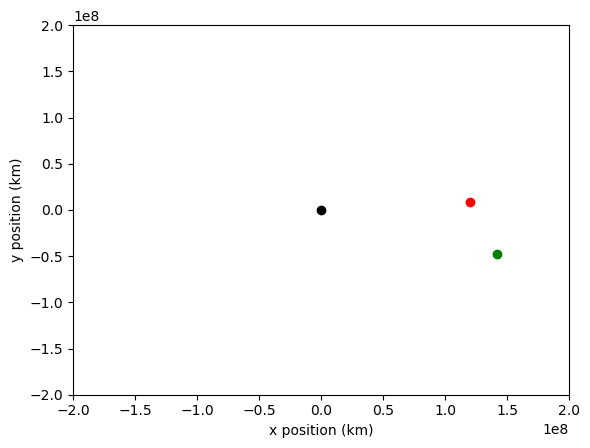

In [20]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def animate3(i): #trouble here
    if i < len(sol2.t): 
        xp1 = sol3.y[0][i * Nskip] / 1000
        yp1 = sol3.y[1][i * Nskip] / 1000
        xp2 = sol3.y[2][i * Nskip] / 1000
        yp2 = sol3.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2


anim3 = animation.FuncAnimation(fig, animate3, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation3.gif"
anim3.save(f, writer=writergif)